In [1]:
%pip install pandas matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 13.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [matplotlib]4 [matplotlib]n]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

In [6]:
train_filename = os.path.join(os.getcwd(), 'ds03/assets/Train_knight.csv')
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(3)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,Sith


In [15]:
df = train_df.copy()

# Encode 'knight' as binary for later use
df['knight_encoded'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# Select only feature columns (exclude 'knight' and encoded version)
feature_cols = [col for col in df.columns if col not in ['knight', 'knight_encoded']]

# Normalize
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df[feature_cols]), columns=feature_cols)

# Z-Score Standardization
scaler_zscore = StandardScaler()
df_standardized = scaler_zscore.fit_transform(df[feature_cols])

# # Add back the label for visualization
# df_normalized['knight'] = df['knight']
# df_normalized['knight_encoded'] = df['knight_encoded']

# df_normalized.head(3)
# df_standardized['Empowered']

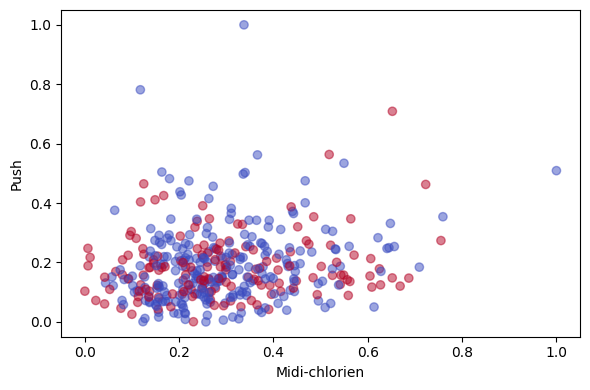

In [ ]:
separating_pair = ('Empowered', 'Prescience')
plt.figure(figsize=(6, 4))
plt.scatter(df_standardized[separating_pair[0]], df_standardized[separating_pair[1]],  c=df_standardized['knight_encoded'], cmap='coolwarm', alpha=0.5, label='Train')
plt.xlabel(separating_pair[0])
plt.ylabel(separating_pair[1])

plt.tight_layout()
plt.show()